# House Price Prediction Analysis

The project is based on the analysis of the different prices of houses and its changes by the change in other features


In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# reading the data

In [2]:
df=pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


By above correlation we can see that only Rooms,Bathroom,Car and Longtitude are directly correlated with price and Suburb,Type,Distance,Yearbuilt and Lattitude are inversely correlated so we take only this columns and drop the other.

## Exploratory Data Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [8]:

## Here we will check the percentage of nan values present in each feature
## 1- step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Price 0.2183  % missing values
Bedroom2 0.2357  % missing values
Bathroom 0.236  % missing values
Car 0.2504  % missing values
Landsize 0.3388  % missing values
BuildingArea 0.6058  % missing values
YearBuilt 0.5539  % missing values
CouncilArea 0.0001  % missing values
Lattitude 0.2288  % missing values
Longtitude 0.2288  % missing values
Regionname 0.0001  % missing values
Propertycount 0.0001  % missing values


From the above it can be concluded that we have few missing data in Price,Bedroom, Bathroom, Car and Landsize, Longitude and Latitude columns. here are so many missing values in Building Area and Year Built features and here Regionname ,Propertycount have less missing values. In next step let's drop the price of missing values

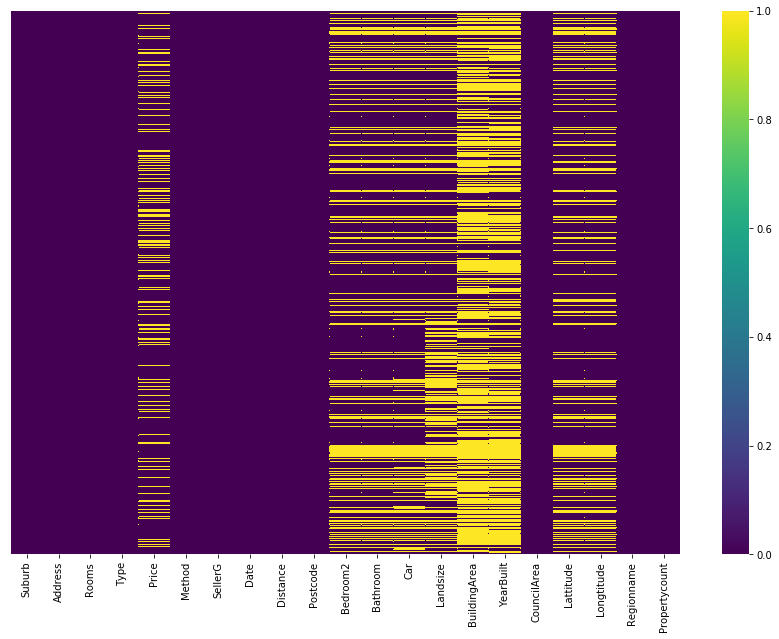

In [9]:
#Visualizing Missing Data
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

### The EDA can be divided into two major parts they are,

### 1. UniVariate Analysis

####    i) Numerical Values


#### ii) Categorical Features

### 2. BiVariate Analysis

## UniVariate Analysis
In this section we will do Univariate Analysis.It is simplest form of analyzing data where we examine each varible individually

### i) Numerical Values

In [10]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 13
the numerical features: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [11]:
df[numerical_features].head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
##Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 4


In [13]:
discrete_feature

['Rooms', 'Bedroom2', 'Bathroom', 'Car']

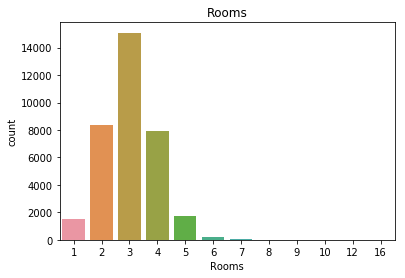

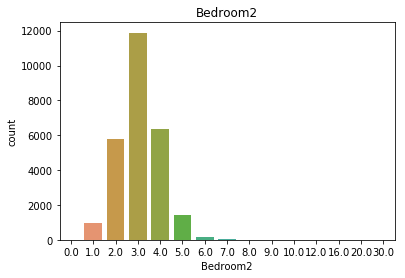

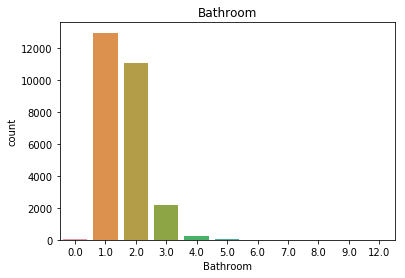

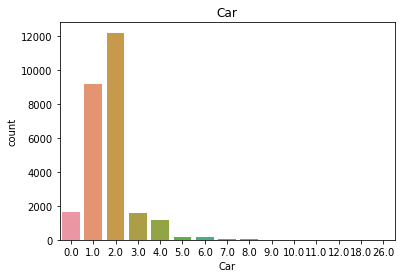

In [14]:
## Lets Find the discrete feature by visualizing data

for feature in discrete_feature:
    data=df.copy()
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [15]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


In [16]:
df[continuous_feature].head()

,Price,Distance,Postcode,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,NaN,2.5,3067.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,1480000.0,2.5,3067.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,1035000.0,2.5,3067.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,NaN,2.5,3067.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,1465000.0,2.5,3067.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


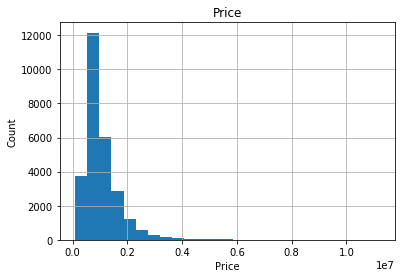

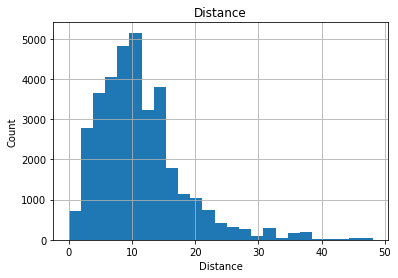

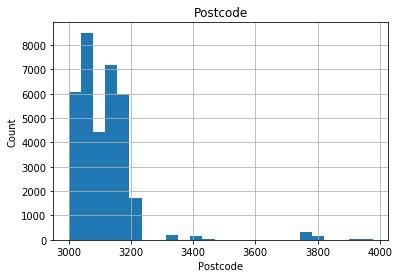

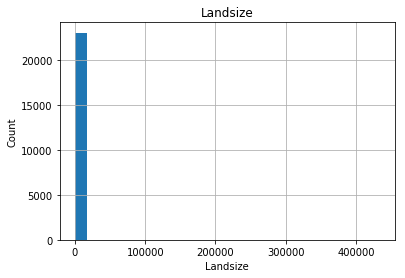

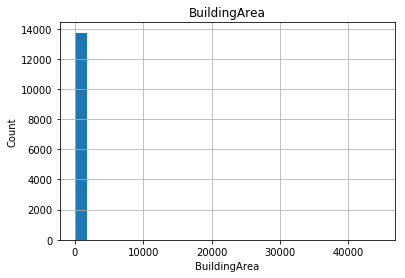

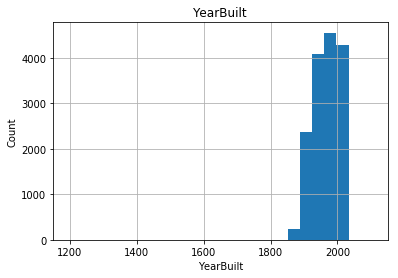

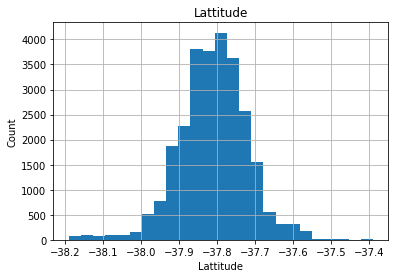

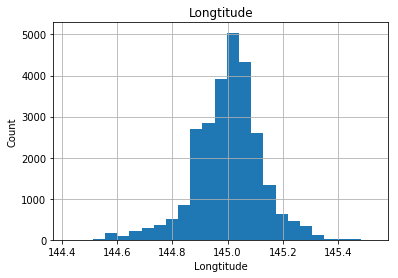

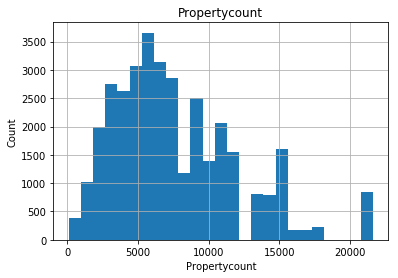

In [17]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    #sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### ii) Categorical Features

In [18]:
#list of categorical features
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [19]:
df[categorical_features].head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Suburb and number of categories are 351
The feature is Address and number of categories are 34009
The feature is Type and number of categories are 3
The feature is Method and number of categories are 9
The feature is SellerG and number of categories are 388
The feature is Date and number of categories are 78
The feature is CouncilArea and number of categories are 34
The feature is Regionname and number of categories are 9


In [21]:
df['Suburb'].value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
Kew                467
Brighton           456
Brunswick          444
South Yarra        435
Hawthorn           428
Northcote          424
Camberwell         423
Balwyn North       420
Essendon           409
Coburg             405
Glenroy            400
Brighton East      393
Pascoe Vale        378
St Kilda           374
Port Melbourne     371
Malvern East       369
Prahran            336
Thornbury          322
Bentleigh          319
Balwyn             319
Yarraville         304
Surrey Hills       293
Elwood             288
Moonee Ponds       285
Hawthorn East      284
                  ... 
Wattle Glen          2
Upwey                2
Hurstbridge          2
Gisborne South       2
Darley               2
Tecoma               2
Plenty               2
Werribee South       2
Lynbrook             2
Silvan               2
Olinda               1
Guys Hill            1
Belgrave   

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

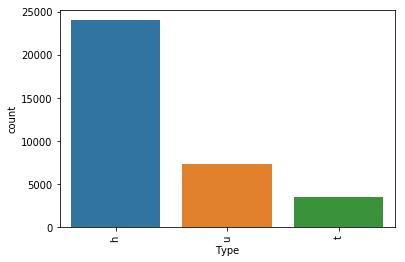

In [22]:
#Now lets check the count of the Type in the visual graph
sns.countplot('Type',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

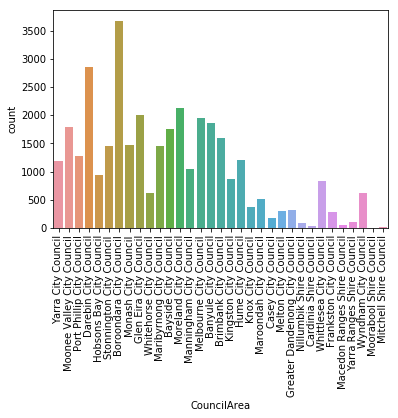

In [23]:
##Now lets check the count of the CouncilArea in the visual graph
sns.countplot('CouncilArea',data=df)
plt.xticks(rotation=90)

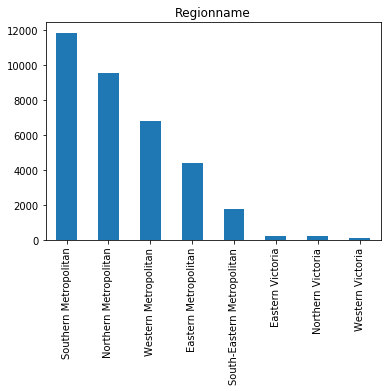

In [24]:
#Now lets check the count of the Reginname in the visual graph
df['Regionname'].value_counts(normalize=False).plot.bar(title='Regionname')
plt.show()

## BiVariate Analysis
After looking at every varible individually in univariate analysis,we will now explore again with respect to target varible

In [25]:
#Check the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

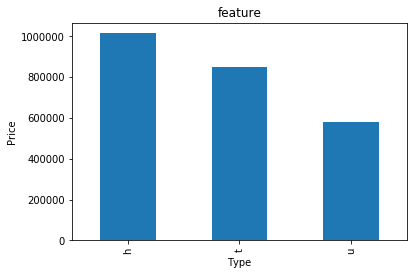

In [26]:
##lets visualize categorical variable of type vs depedent variable Price 
data.groupby('Type')['Price'].median().plot.bar()
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('feature')
plt.show()


These above plots compares that h type (house) is generally priced higher than t (townhouse) which is higher than u (unit)

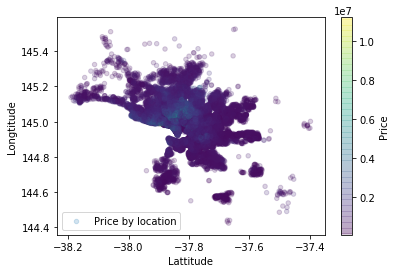

In [27]:
#visualize how geographical data looks like
df.plot(kind='scatter',x='Lattitude',y='Longtitude',c='Price',alpha=0.2,colorbar=True, sharex=False,label= 'Price by location', cmap=plt.get_cmap("viridis"))
plt.legend(fontsize=10)

This plot is quite confusing, because most values are in the low end of the Price range and they turn out as blue and it also most extreme outliers

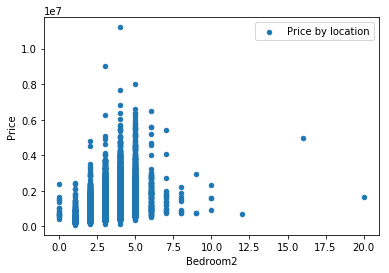

In [28]:
#lets visualize the bedroom2 vs Price
df.plot(kind='scatter',x='Bedroom2',y='Price',label= 'Price by location')
plt.legend(fontsize=10)

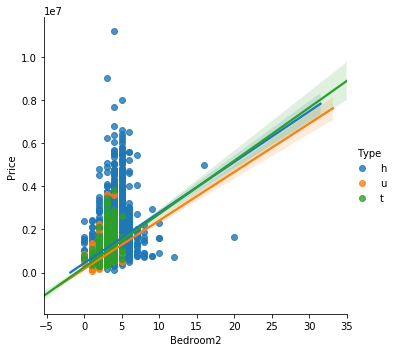

In [29]:
#Type impact on bedroom2 vs Price
sns.lmplot(data=df,x='Bedroom2',y="Price",hue="Type")

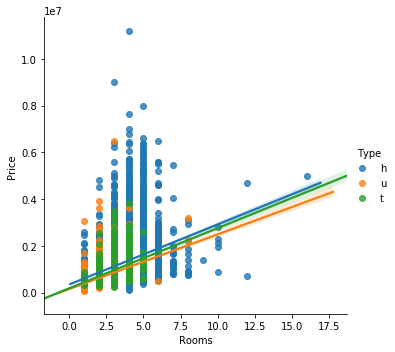

In [30]:
##Type impact on Rooms vs Price
sns.lmplot(data= df, x='Rooms', y= 'Price', hue='Type')

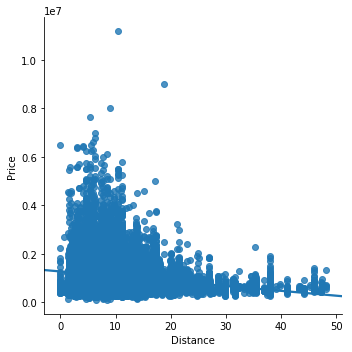

In [31]:
##Type impact on Distance vs Price
sns.lmplot(data= df, x='Distance', y= 'Price')

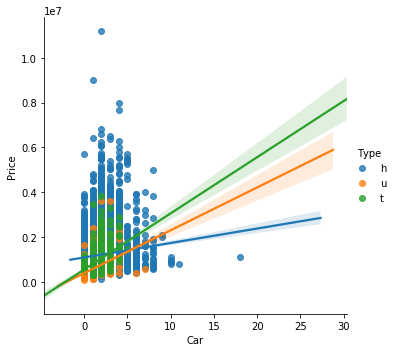

In [32]:
##Type impact on Car vs Price
sns.lmplot(data= df, x='Car', y= 'Price', hue='Type')

## Feature Extraction

### Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['Type']=le.fit_transform(df['Type'])
df['Method']=le.fit_transform(df['Method'])
df['Suburb']=le.fit_transform(df['Suburb'])
df['SellerG']=le.fit_transform(df['SellerG'])
df['CouncilArea'],CouncilArea= pd.factorize(df['CouncilArea'])
df['Regionname'],Regionname= pd.factorize(df['Regionname'])

In [35]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,68 Studley St,2,0,NaN,6,155,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,0,-37.8014,144.9958,0,4019.0
1,0,85 Turner St,2,0,1480000.0,2,33,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,0,-37.7996,144.9984,0,4019.0
2,0,25 Bloomburg St,2,0,1035000.0,2,33,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,0,-37.8079,144.9934,0,4019.0
3,0,18/659 Victoria St,3,2,NaN,7,296,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,0,-37.8114,145.0116,0,4019.0
4,0,5 Charles St,3,0,1465000.0,5,33,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,0,-37.8093,144.9944,0,4019.0


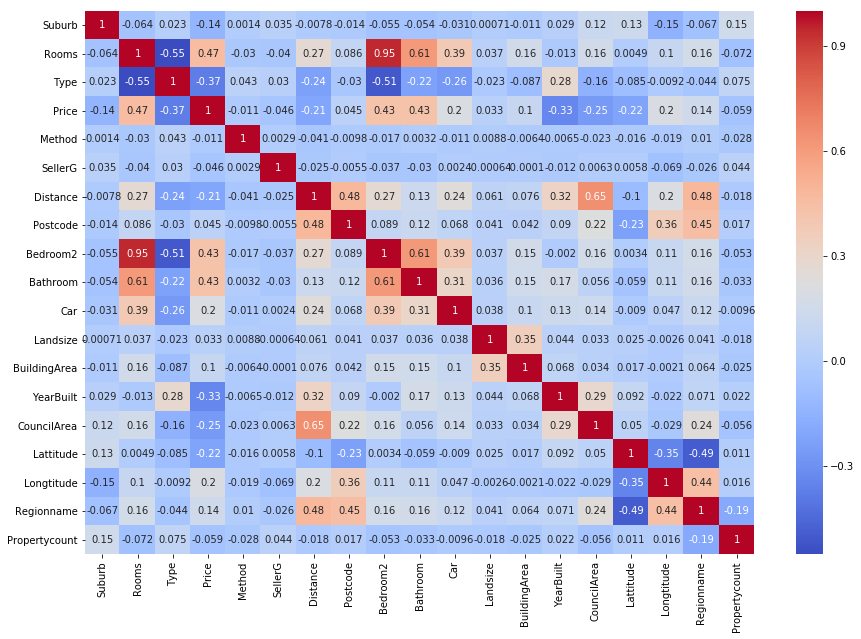

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Here we can observe the multicolinearty of 0.95 between Rooms and Bedroom, to removie multicolinearty we removie bedroom from data set.

In [37]:
df.drop(['Bedroom2'],axis=1,inplace=True)

The columns with high null values and with out colinearty are droped

In [38]:
df.drop(['Landsize','Address','Date','BuildingArea','Postcode','Propertycount'],axis=1,inplace=True)

In [39]:
df.drop(['Method','SellerG','CouncilArea','Regionname'],axis=1,inplace=True)

In [40]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,NaN,-37.8014,144.9958
1,0,2,0,1480000.0,2.5,1.0,1.0,NaN,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
3,0,3,2,NaN,2.5,2.0,1.0,NaN,-37.8114,145.0116
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944


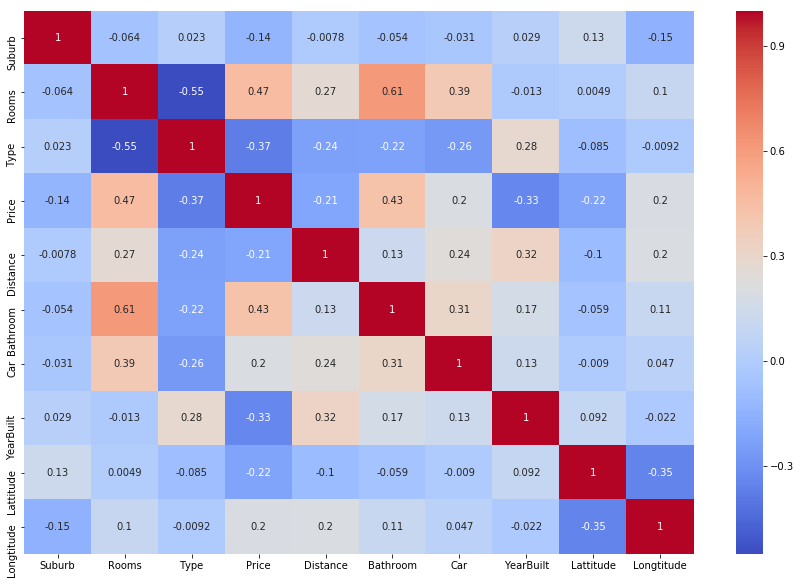

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


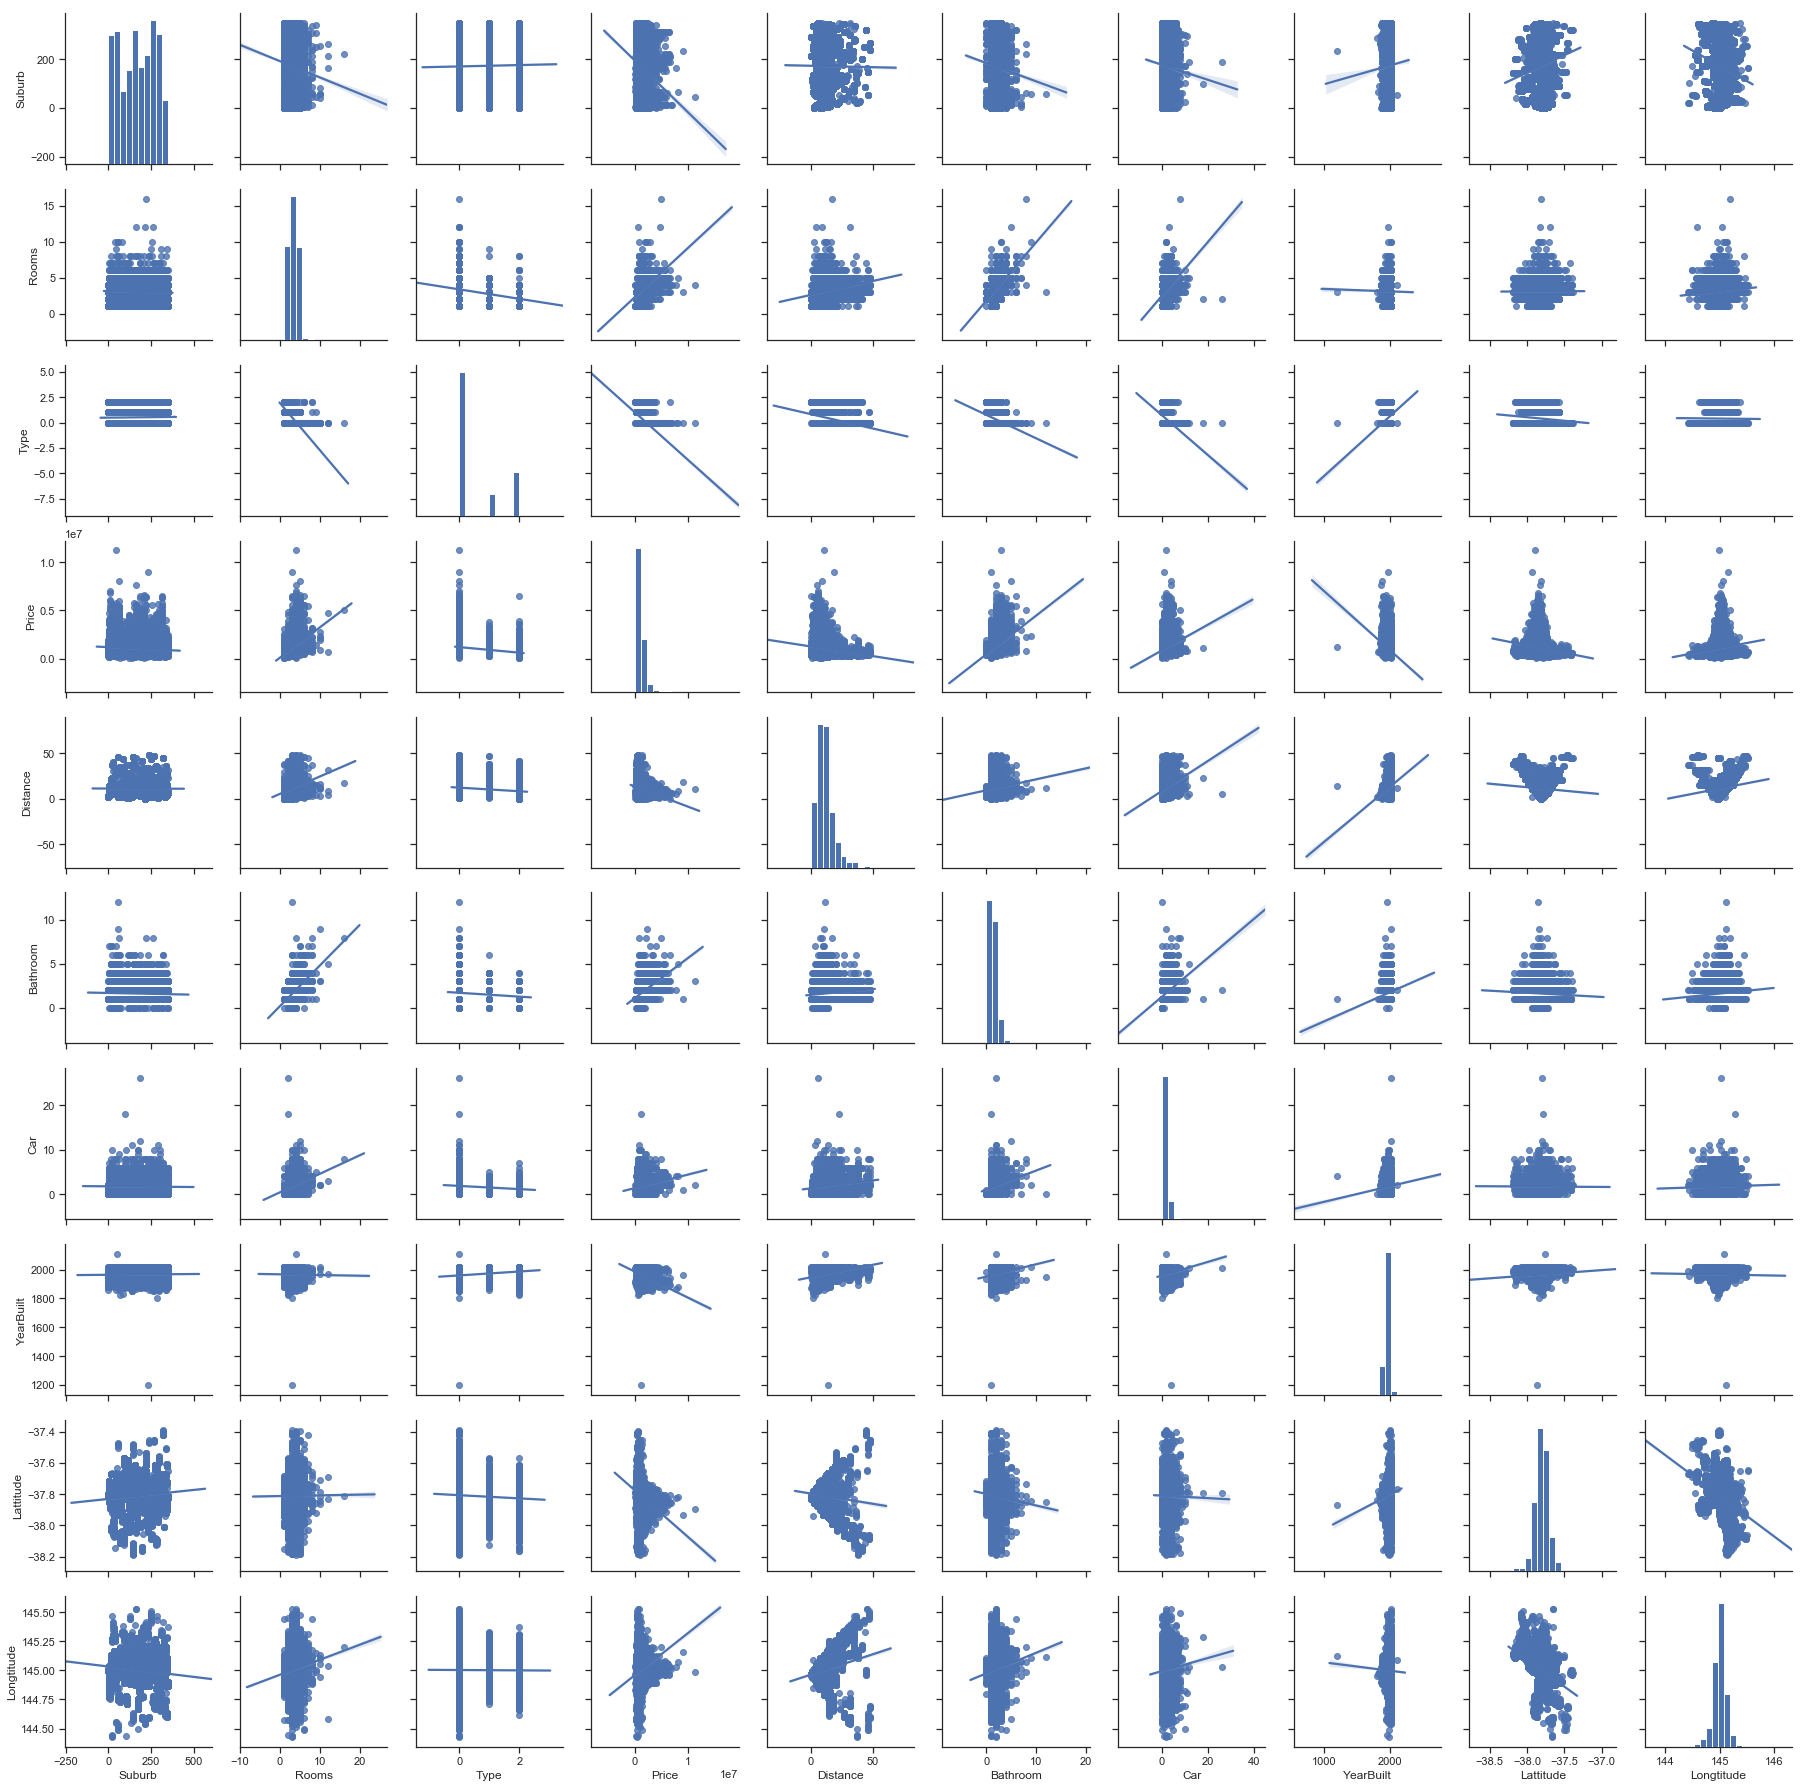

In [42]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,kind='reg')


By the plot we can say that Price has a high dependence on Rooms,Bathroom and Car

## outlier

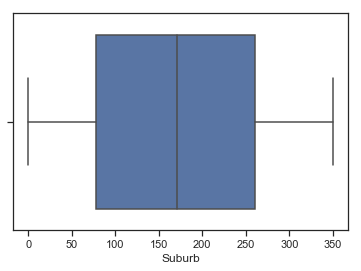

In [43]:
sns.boxplot(df['Suburb'])

We have no outliers in Suburb column

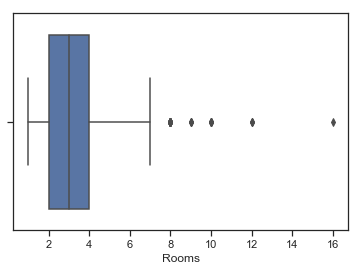

In [44]:
sns.boxplot(df['Rooms'])

We have few outliers in Rooms

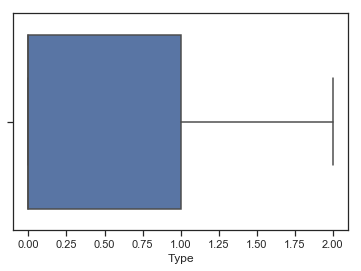

In [45]:
sns.boxplot(df['Type'])

We have no outliers in Type

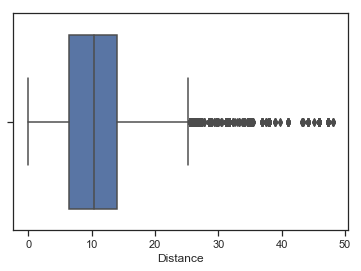

In [46]:
sns.boxplot(df['Distance'])

We have a lot of outliers in Distance

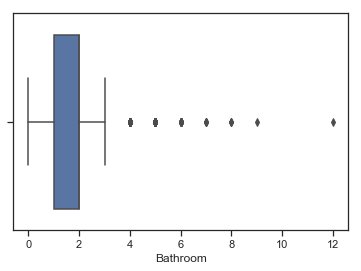

In [47]:
sns.boxplot(df['Bathroom'])

We have Few outliers in Bathroom

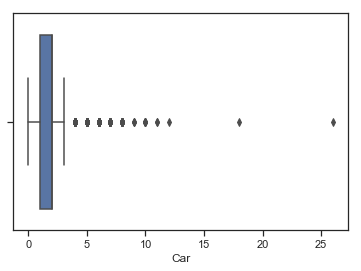

In [48]:
sns.boxplot(df['Car'])

We have few outliers in Car

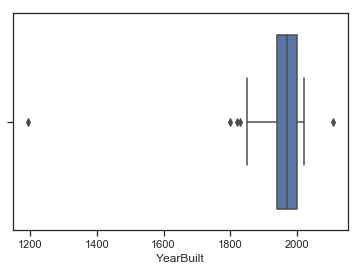

In [49]:
sns.boxplot(df['YearBuilt'])

We have Few outliers in Yearbilt

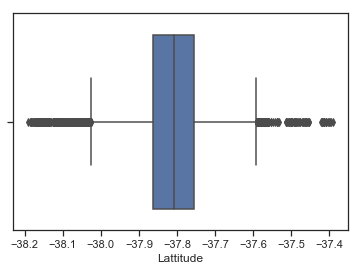

In [50]:
sns.boxplot(df['Lattitude'])

We have lot of outliers in Lattitude

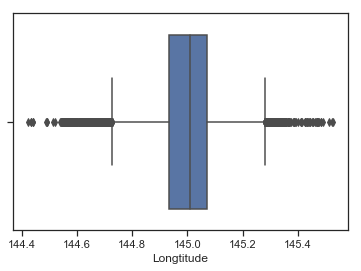

In [51]:
sns.boxplot(df['Longtitude'])

We have lot of outliers in Longtitude

### removing outliers in Rooms

In [52]:
df['Rooms'].describe()

count    34857.000000
mean         3.031012
std          0.969933
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

In [53]:
upper_boundary=df['Rooms'].mean() + 3* df['Rooms'].std()
lower_boundary=df['Rooms'].mean() - 3* df['Rooms'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Rooms.quantile(0.75)-df.Rooms.quantile(0.25)
print(IQR)
lower_bridge=df['Rooms'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Rooms'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

0.12121361748996451
5.9408112268741515
2.0
-1.0
7.0


In [54]:
df.loc[df['Rooms']>=6,'Rooms']=6

In [55]:
df['Rooms'].describe()

count    34857.000000
mean         3.027168
std          0.951354
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Rooms, dtype: float64

### removing outliers in Distance

In [56]:
df['Distance'].describe()

count    34856.000000
mean        11.184929
std          6.788892
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

In [57]:
upper_boundary=df['Distance'].mean() + 3* df['Distance'].std()
lower_boundary=df['Distance'].mean() - 3* df['Distance'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Distance.quantile(0.75)-df.Distance.quantile(0.25)
print(IQR)
lower_bridge=df['Distance'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Distance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-9.181747943891825
31.551606791724975
7.6
-4.999999999999998
25.4


In [58]:
df.loc[df['Distance']>=31.6,'Distance']=31.6

### removing outliers in Bathroom

In [59]:
df['Bathroom'].describe()

count    26631.000000
mean         1.624798
std          0.724212
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

In [60]:
upper_boundary=df['Bathroom'].mean() + 3* df['Bathroom'].std()
lower_boundary=df['Bathroom'].mean() - 3* df['Bathroom'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Bathroom.quantile(0.75)-df.Bathroom.quantile(0.25)
print(IQR)
lower_bridge=df['Bathroom'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Bathroom'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.5478378668610882
3.797434201959282
1.0
-0.5
3.5


In [61]:
df.loc[df['Bathroom']>=4,'Bathroom']=4

### removing outliers in Car

In [62]:
df['Car'].describe()

count    26129.000000
mean         1.728845
std          1.010771
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

In [63]:
upper_boundary=df['Car'].mean() + 3* df['Car'].std()
lower_boundary=df['Car'].mean() - 3* df['Car'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Car.quantile(0.75)-df.Car.quantile(0.25)
print(IQR)
lower_bridge=df['Car'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Car'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1.3034670118127865
4.761157700319809
1.0
-0.5
3.5


In [64]:
df.loc[df['Car']>=5,'Car']=5

### removing outliers in Yearbuilt

In [65]:
df['YearBuilt'].describe()

count    15551.000000
mean      1965.289885
std         37.328178
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       2000.000000
max       2106.000000
Name: YearBuilt, dtype: float64

In [66]:
upper_boundary=df['YearBuilt'].mean() + 3* df['YearBuilt'].std()
lower_boundary=df['YearBuilt'].mean() - 3* df['YearBuilt'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.YearBuilt.quantile(0.75)-df.YearBuilt.quantile(0.25)
print(IQR)
lower_bridge=df['YearBuilt'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['YearBuilt'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1853.3053508254523
2077.2744189642717
60.0
1850.0
2090.0


In [67]:
df.loc[df['YearBuilt']<=1850,'YearBuilt']=1850
df.loc[df['YearBuilt']>=2030,'YearBuilt']=2030

### removing outliers in Lattitude

In [68]:
df['Lattitude'].describe()

count    26881.000000
mean       -37.810634
std          0.090279
min        -38.190430
25%        -37.862950
50%        -37.807600
75%        -37.754100
max        -37.390200
Name: Lattitude, dtype: float64

In [69]:
upper_boundary=df['Lattitude'].mean() + 3* df['Lattitude'].std()
lower_boundary=df['Lattitude'].mean() - 3* df['Lattitude'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Lattitude.quantile(0.75)-df.Lattitude.quantile(0.25)
print(IQR)
lower_bridge=df['Lattitude'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Lattitude'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-38.081471009126766
-37.53979758207142
0.10884999999999678
-38.026225
-37.59082500000001


In [70]:
df.loc[df['Lattitude']<=-38.0,'Lattitude']=-38.0
df.loc[df['Lattitude']>=-37.7,'Lattitude']=-37.7

### removing outliers in Longtitude

In [71]:
df['Longtitude'].describe()

count    26881.000000
mean       145.001851
std          0.120169
min        144.423790
25%        144.933500
50%        145.007800
75%        145.071900
max        145.526350
Name: Longtitude, dtype: float64

In [72]:
upper_boundary=df['Longtitude'].mean() + 3* df['Longtitude'].std()
lower_boundary=df['Longtitude'].mean() - 3* df['Longtitude'].std()
print(lower_boundary)
print(upper_boundary)
IQR=df.Longtitude.quantile(0.75)-df.Longtitude.quantile(0.25)
print(IQR)
lower_bridge=df['Longtitude'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Longtitude'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

144.6413448241942
145.3623574391153
0.1383999999999901
144.72590000000002
145.27949999999998


In [73]:
df.loc[df['Longtitude']<=144.6,'Longtitude']=144.6
df.loc[df['Longtitude']>=145.3,'Longtitude']=145.3

### Handling null values

In [74]:
#df.Bathroom=df.Bathroom.fillna(float(df.Bathroom.median()))

#df.Car=df.Car.fillna(int(df.Car.median()))

df.Longtitude=df.Longtitude.fillna(int(df.Longtitude.median()))

df.Distance=df.Distance.fillna(int(df.Distance.median()))
df.YearBuilt=df.YearBuilt.fillna(int(df.YearBuilt.median()))

df.Lattitude=df.Lattitude.fillna(int(df.Lattitude.median()))

### filling bathroom with algorithm

In [75]:
bathroom_test=df[df['Bathroom'].isnull()]
bathroom_train=df.dropna(axis=0,how='any',subset=['Bathroom'])

In [76]:
bathroom_train.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,1970.0,-37.8014,144.9958
1,0,2,0,1480000.0,2.5,1.0,1.0,1970.0,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
3,0,3,2,NaN,2.5,2.0,1.0,1970.0,-37.8114,145.0116
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944


In [77]:
bathroom_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 0 to 34856
Data columns (total 10 columns):
Suburb        26631 non-null int32
Rooms         26631 non-null int64
Type          26631 non-null int32
Price         20800 non-null float64
Distance      26631 non-null float64
Bathroom      26631 non-null float64
Car           26129 non-null float64
YearBuilt     26631 non-null float64
Lattitude     26631 non-null float64
Longtitude    26631 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.0 MB


In [78]:
x=bathroom_train[['Suburb','Rooms','Type','Distance','YearBuilt','Lattitude','Longtitude']]
y=bathroom_train['Bathroom']

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

# create the model object
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_prd=lr.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_prd,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.690863579474343


In [80]:
bathroom_test.head(10)

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
15,0,3,0,1000000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
16,0,2,1,745000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
19,0,2,2,542000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
21,0,2,2,760000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
22,0,1,2,481000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
26,0,4,0,1985000.0,2.5,NaN,NaN,1970.0,-37.8084,144.9942
27,0,1,2,500000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
33,0,2,1,847000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000
34,0,2,0,NaN,2.5,NaN,NaN,1970.0,-37.0000,145.0000
45,0,1,2,480000.0,2.5,NaN,NaN,1970.0,-37.0000,145.0000


In [81]:
bathroom_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 15 to 34855
Data columns (total 10 columns):
Suburb        8226 non-null int32
Rooms         8226 non-null int64
Type          8226 non-null int32
Price         6447 non-null float64
Distance      8226 non-null float64
Bathroom      0 non-null float64
Car           0 non-null float64
YearBuilt     8226 non-null float64
Lattitude     8226 non-null float64
Longtitude    8226 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 642.7 KB


In [82]:
bathroom_test.drop(['Bathroom'],axis=1,inplace=True)
x2=bathroom_test[['Suburb','Rooms','Type','Distance','YearBuilt','Lattitude','Longtitude']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
bathroom=lr.predict(x2)
bathroom_test['Bathroom']=np.round(bathroom)
bathroom_test=bathroom_test[['Suburb','Rooms','Type','Price','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
df=pd.concat([bathroom_train,bathroom_test])
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,1970.0,-37.8014,144.9958
1,0,2,0,1480000.0,2.5,1.0,1.0,1970.0,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
3,0,3,2,NaN,2.5,2.0,1.0,1970.0,-37.8114,145.0116
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944


### filling car with algorithm

In [85]:
Car_test=df[df['Car'].isnull()]
Car_train=df.dropna(axis=0,how='any',subset=['Car'])

In [86]:
Car_train.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,1970.0,-37.8014,144.9958
1,0,2,0,1480000.0,2.5,1.0,1.0,1970.0,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
3,0,3,2,NaN,2.5,2.0,1.0,1970.0,-37.8114,145.0116
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944


In [87]:
Car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26129 entries, 0 to 34856
Data columns (total 10 columns):
Suburb        26129 non-null int32
Rooms         26129 non-null int64
Type          26129 non-null int32
Price         20423 non-null float64
Distance      26129 non-null float64
Bathroom      26129 non-null float64
Car           26129 non-null float64
YearBuilt     26129 non-null float64
Lattitude     26129 non-null float64
Longtitude    26129 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.0 MB


In [88]:
x=Car_train[['Suburb','Rooms','Type','Distance','Bathroom','YearBuilt','Lattitude','Longtitude']]
y=Car_train['Car']

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

# create the model object
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_prd=lr.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_prd,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6026278862099758


In [90]:
Car_test.head(10)

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
19752,11,2,2,450000.0,6.3,1.0,NaN,1970.0,-37.85816,145.02001
19759,12,3,0,985000.0,4.3,1.0,NaN,1945.0,-37.77215,144.91144
19832,50,2,0,1023000.0,4.0,1.0,NaN,1890.0,-37.77221,144.97537
19875,83,3,0,1436000.0,3.6,2.0,NaN,1990.0,-37.78888,145.00036
19903,102,3,0,585000.0,24.7,1.0,NaN,1960.0,-37.96415,145.21441
19929,118,4,0,NaN,1.3,1.0,NaN,1970.0,-37.81275,144.98498
20000,151,3,0,1370000.0,16.7,1.0,NaN,1970.0,-37.87170,145.17267
20035,163,3,0,NaN,6.2,1.0,NaN,1900.0,-37.82191,145.05572
20090,207,3,0,NaN,5.9,1.0,NaN,1970.0,-37.85836,145.03693
20101,212,2,2,520000.0,0.0,1.0,NaN,1989.0,-37.81205,144.96064


In [91]:
Car_test.drop(['Car'],axis=1,inplace=True)
x2=Car_test[['Suburb','Rooms','Type','Distance','Bathroom','YearBuilt','Lattitude','Longtitude']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [92]:
Car=lr.predict(x2)
Car_test['Car']=np.round(Car)
Car_test=Car_test[['Suburb','Rooms','Type','Price','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df=pd.concat([Car_train,Car_test])
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,1970.0,-37.8014,144.9958
1,0,2,0,1480000.0,2.5,1.0,1.0,1970.0,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
3,0,3,2,NaN,2.5,2.0,1.0,1970.0,-37.8114,145.0116
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944


### filling price with algorithm

In [94]:
test_data=df[df['Price'].isnull()]

In [95]:
train_data=df.dropna(axis=0,how='any',subset=['Price'])

In [96]:
train_data.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
1,0,2,0,1480000.0,2.5,1.0,1.0,1970.0,-37.7996,144.9984
2,0,2,0,1035000.0,2.5,1.0,0.0,1900.0,-37.8079,144.9934
4,0,3,0,1465000.0,2.5,2.0,0.0,1900.0,-37.8093,144.9944
5,0,3,0,850000.0,2.5,2.0,1.0,1970.0,-37.7969,144.9969
6,0,4,0,1600000.0,2.5,1.0,2.0,2014.0,-37.8072,144.9941


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34855
Data columns (total 10 columns):
Suburb        27247 non-null int32
Rooms         27247 non-null int64
Type          27247 non-null int32
Price         27247 non-null float64
Distance      27247 non-null float64
Bathroom      27247 non-null float64
Car           27247 non-null float64
YearBuilt     27247 non-null float64
Lattitude     27247 non-null float64
Longtitude    27247 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.1 MB


In [98]:
train_data.isnull().sum()

Suburb        0
Rooms         0
Type          0
Price         0
Distance      0
Bathroom      0
Car           0
YearBuilt     0
Lattitude     0
Longtitude    0
dtype: int64

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34855
Data columns (total 10 columns):
Suburb        27247 non-null int32
Rooms         27247 non-null int64
Type          27247 non-null int32
Price         27247 non-null float64
Distance      27247 non-null float64
Bathroom      27247 non-null float64
Car           27247 non-null float64
YearBuilt     27247 non-null float64
Lattitude     27247 non-null float64
Longtitude    27247 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.1 MB


In [100]:
x=train_data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]
y=train_data['Price']

### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### Model creatation for train_data

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf=RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [105]:
from sklearn import metrics

In [106]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

In [107]:
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('r2score : ',r2*100)
print('Mean : ',df['Price'].mean())


Mean Absolute Error :  188643.043306388
Mean Squared Error :  107083172294.17036
Root Mean Squared Error :  327235.65254136105
r2score :  72.73716313006334
Mean :  1050173.344955408


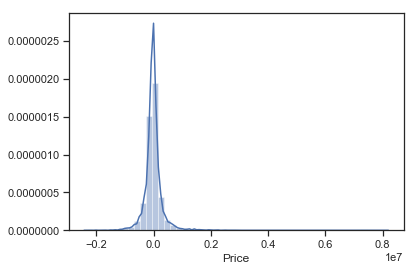

In [108]:
sns.distplot((y_test-y_pred),bins=50)

In [109]:
test_data.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,0,2,0,NaN,2.5,1.0,1.0,1970.0,-37.8014,144.9958
3,0,3,2,NaN,2.5,2.0,1.0,1970.0,-37.8114,145.0116
7,0,4,0,NaN,2.5,2.0,2.0,2006.0,-37.7965,144.9965
8,0,2,0,NaN,2.5,1.0,2.0,1900.0,-37.7995,144.9974
9,0,2,0,NaN,2.5,2.0,1.0,1900.0,-37.7996,144.9989


In [110]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 34829
Data columns (total 10 columns):
Suburb        7610 non-null int32
Rooms         7610 non-null int64
Type          7610 non-null int32
Price         0 non-null float64
Distance      7610 non-null float64
Bathroom      7610 non-null float64
Car           7610 non-null float64
YearBuilt     7610 non-null float64
Lattitude     7610 non-null float64
Longtitude    7610 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 594.5 KB


In [111]:
test_data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price         7610
Distance         0
Bathroom         0
Car              0
YearBuilt        0
Lattitude        0
Longtitude       0
dtype: int64

In [112]:
test_data.drop(['Price'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [113]:
x2=test_data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]

In [114]:
price=rf.predict(x2)
price

array([1145765.5       , 1132816.46100566, 2097600.15238095, ...,
        606433.86411921, 1070037.89523809, 1149733.77605173])

In [115]:
test_data['Price']=np.round(price)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
test_data.head()

,Suburb,Rooms,Type,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude,Price
0,0,2,0,2.5,1.0,1.0,1970.0,-37.8014,144.9958,1145766.0
3,0,3,2,2.5,2.0,1.0,1970.0,-37.8114,145.0116,1132816.0
7,0,4,0,2.5,2.0,2.0,2006.0,-37.7965,144.9965,2097600.0
8,0,2,0,2.5,1.0,2.0,1900.0,-37.7995,144.9974,1128065.0
9,0,2,0,2.5,2.0,1.0,1900.0,-37.7996,144.9989,1162750.0


### merging data frames

In [117]:
train_data=train_data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude','Price']]

In [118]:
data=pd.concat([train_data,test_data])

In [119]:
data.head()

,Suburb,Rooms,Type,Distance,Bathroom,Car,YearBuilt,Lattitude,Longtitude,Price
1,0,2,0,2.5,1.0,1.0,1970.0,-37.7996,144.9984,1480000.0
2,0,2,0,2.5,1.0,0.0,1900.0,-37.8079,144.9934,1035000.0
4,0,3,0,2.5,2.0,0.0,1900.0,-37.8093,144.9944,1465000.0
5,0,3,0,2.5,2.0,1.0,1970.0,-37.7969,144.9969,850000.0
6,0,4,0,2.5,1.0,2.0,2014.0,-37.8072,144.9941,1600000.0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34857 entries, 1 to 34829
Data columns (total 10 columns):
Suburb        34857 non-null int32
Rooms         34857 non-null int64
Type          34857 non-null int32
Distance      34857 non-null float64
Bathroom      34857 non-null float64
Car           34857 non-null float64
YearBuilt     34857 non-null float64
Lattitude     34857 non-null float64
Longtitude    34857 non-null float64
Price         34857 non-null float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.7 MB


## Model Creation

## Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
X=data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]
y=data['Price']

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [126]:
lr=LinearRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


In [127]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

In [128]:
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('r2score : ',r2*100)
print('Mean : ',df['Price'].mean())

Mean Absolute Error :  314909.85996054433
Mean Squared Error :  203968104026.2212
Root Mean Squared Error :  451628.28080869914
r2score :  53.410115488213705
Mean :  1050173.344955408


## Decision Tree 

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
X=data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]
y=data['Price']

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [132]:
dtree =DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [133]:
y_pred=dtree.predict(X_test)

In [134]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

In [135]:
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('r2score : ',r2*100)
print('Mean : ',df['Price'].mean())

Mean Absolute Error :  266581.68943337724
Mean Squared Error :  166874521998.58395
Root Mean Squared Error :  408502.7808945539
r2score :  61.88293878108466
Mean :  1050173.344955408


## Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
X=data[['Suburb','Rooms','Type','Distance','Bathroom','Car','YearBuilt','Lattitude','Longtitude']]
y=data['Price']

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [139]:
rf=RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [140]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

In [141]:
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('r2score : ',r2*100)
print('Mean : ',df['Price'].mean())


Mean Absolute Error :  153782.83605730307
Mean Squared Error :  75831757633.43456
Root Mean Squared Error :  275375.6663785574
r2score :  82.67869945972876
Mean :  1050173.344955408


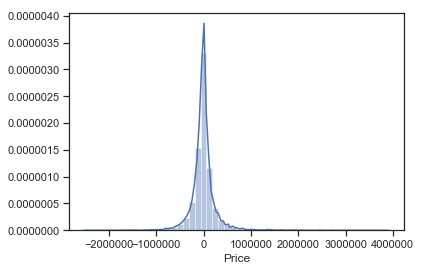

In [142]:
sns.distplot((y_test-y_pred),bins=50)

## Hyper Parmater Tunning

The main parameters used by a Random Forest Regressor are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.


In [143]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [144]:
rft=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rft,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 4, 6, 8]},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [145]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340}

In [146]:
rf_randomcv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=340,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [147]:
y_pred=rf_randomcv.best_estimator_.predict(X_test)

mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

In [148]:
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('r2score : ',r2*100)
print('Mean : ',df['Price'].mean())


Mean Absolute Error :  153983.9998661816
Mean Squared Error :  72001413926.93306
Root Mean Squared Error :  268330.7919843212
r2score :  83.55361699538135
Mean :  1050173.344955408


### Residual Histrogram

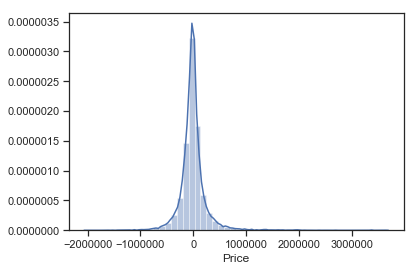

In [149]:
sns.distplot((y_test-y_pred),bins=50)

we can see the model accuracy is 83.55 %